# Generating word clouds

# Defining constants and variables

In [1]:
# Use the output from the "Keyword extraction with TF-IDF and SKlearn (based on description fields)" Notebook
filename = r'outputs/incidents by period with keywords (all combinations) without weighting.xlsx'
column_names = ['incident_id', 'status', 'name', 'period', 'description', 'text to be mined']

# Dataset | Loading

In [2]:
import pandas as pd
df = pd.read_excel(r''+filename+'', index_col=None, na_values=['NA'])

In [3]:
df.head()

,Unnamed: 0,incident_id,status,name,period,description,text to be mined,length,word_count,raw_text,stemmed_or_lemmatized_text,keywords (all combinations) without weighting
0,0,1,Open,Hidden Financial Risks That Regulators Miss,2021-02,Behavioral economists have shown that people a...,hidden financial risk that regulator miss beha...,251,39,"['hidden', 'financial', 'risks', 'that', 'regu...",hidden financial risk that regulator miss beha...,"thumb judgment concluding rising market,thumb ..."
1,1,2,Closed,"Environmental, social and governance issues",2021-01,brings to mind environmental issues like clima...,environmental social and governance issue brin...,120,16,"['environmental', 'social', 'and', 'governance...",environmental social and governance issue brin...,"social governance issue brings mind,social gov..."
2,2,3,Draft,Cybersecurity,2021-01,unwanted or unexpected cyber security event,cybersecurity unwanted or unexpected cyber sec...,57,7,"['cybersecurity', 'unwanted', 'or', 'unexpecte...",cybersecurity unwanted or unexpected cyber sec...,"unwanted unexpected cyber security event,unwan..."
3,3,4,Cancelled,Credit,2021-03,possibility of a loss resulting from a borrowe...,credit possibility of a loss resulting from a ...,112,19,"['credit', 'possibility', 'of', 'a', 'loss', '...",credit possibility of a loss resulting from a ...,"resulting borrower failure repay loan,resultin..."
4,4,5,Draft,Regulatory/compliance,2021-03,"organization's adherence to laws, regulations,...",regulatory compliance organization s adherence...,131,16,"['regulatory', 'compliance', 'organization', '...",regulatory compliance organization s adherence...,"specification relevant business process,specif..."


# Filtering dataset

In [4]:
# Select period(s) of interest
arrayPeriods = ['2021-03', '2021-02']

# Define the columns/fields we would like to mine
fieldToBeMined = 'text to be mined'

# Select a row based on multiple conditions you can use &:
df_final = df.loc[(df['period'] == '2021-03')][['incident_id', 'status', 'name', 'period', 'description']]

# Cleansing | getting rid of rows having null values for description
# ~ is there for the negation = isnotnull()
df = df[~df[fieldToBeMined].isnull()]

In [5]:
# Viewing DataFrame
df.head(10)

,Unnamed: 0,incident_id,status,name,period,description,text to be mined,length,word_count,raw_text,stemmed_or_lemmatized_text,keywords (all combinations) without weighting
0,0,1,Open,Hidden Financial Risks That Regulators Miss,2021-02,Behavioral economists have shown that people a...,hidden financial risk that regulator miss beha...,251,39,"['hidden', 'financial', 'risks', 'that', 'regu...",hidden financial risk that regulator miss beha...,"thumb judgment concluding rising market,thumb ..."
1,1,2,Closed,"Environmental, social and governance issues",2021-01,brings to mind environmental issues like clima...,environmental social and governance issue brin...,120,16,"['environmental', 'social', 'and', 'governance...",environmental social and governance issue brin...,"social governance issue brings mind,social gov..."
2,2,3,Draft,Cybersecurity,2021-01,unwanted or unexpected cyber security event,cybersecurity unwanted or unexpected cyber sec...,57,7,"['cybersecurity', 'unwanted', 'or', 'unexpecte...",cybersecurity unwanted or unexpected cyber sec...,"unwanted unexpected cyber security event,unwan..."
3,3,4,Cancelled,Credit,2021-03,possibility of a loss resulting from a borrowe...,credit possibility of a loss resulting from a ...,112,19,"['credit', 'possibility', 'of', 'a', 'loss', '...",credit possibility of a loss resulting from a ...,"resulting borrower failure repay loan,resultin..."
4,4,5,Draft,Regulatory/compliance,2021-03,"organization's adherence to laws, regulations,...",regulatory compliance organization s adherence...,131,16,"['regulatory', 'compliance', 'organization', '...",regulatory compliance organization s adherence...,"specification relevant business process,specif..."
5,5,6,Open,Strategic,2021-03,arise from the fundamental decisions that dire...,strategic arise from the fundamental decision ...,106,14,"['strategic', 'arise', 'from', 'the', 'fundame...",strategic arise from the fundamental decision ...,"take concerning organisation objective,take co..."
6,6,7,Open,Operational resilience,2021-03,entity's ability to withstand and recover from...,operational resilience entity s ability to wit...,76,11,"['operational', 'resilience', 'entity', 's', '...",operational resilience entity s ability to wit...,"withstand recover shock,withstand recover,resi..."
7,7,8,Open,Conduct and culture,2020-12,"inappropriate, unethical or unlawful behaviour...",conduct and culture inappropriate unethical or...,122,18,"['conduct', 'and', 'culture', 'inappropriate',...",conduct and culture inappropriate unethical or...,unlawful behaviour part organisation managemen...
8,8,9,Closed,Reputation,2020-10,poor coordination of the decisions made by dif...,reputation poor coordination of the decision m...,92,13,"['reputation', 'poor', 'coordination', 'of', '...",reputation poor coordination of the decision m...,"unit function,reputation poor coordination dec..."
9,9,10,Closed,perceived reputational risk,2020-09,oil drillers and gun manufacturers,perceived reputational risk oil drillers and g...,62,8,"['perceived', 'reputational', 'risk', 'oil', '...",perceived reputational risk oil drillers and g...,"risk oil drillers gun manufacturer,risk oil dr..."


In [6]:
df_final.head(10)

,incident_id,status,name,period,description
3,4,Cancelled,Credit,2021-03,possibility of a loss resulting from a borrowe...
4,5,Draft,Regulatory/compliance,2021-03,"organization's adherence to laws, regulations,..."
5,6,Open,Strategic,2021-03,arise from the fundamental decisions that dire...
6,7,Open,Operational resilience,2021-03,entity's ability to withstand and recover from...


## STOPWORDS | define and enrich a list of stopwords

In [7]:
from nltk.corpus import stopwords

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [11]:
# Creating a list of stopwords
stop_words = set(stopwords.words('English'))
stop_words

# Adding custom stopwords to a list of stopwords
new_words = ['t', 'nan', 'th']

stop_words_customized = stop_words.union(new_words)
stop_words_customized

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'nan',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'o

# Generating Word Cloud

In [9]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt

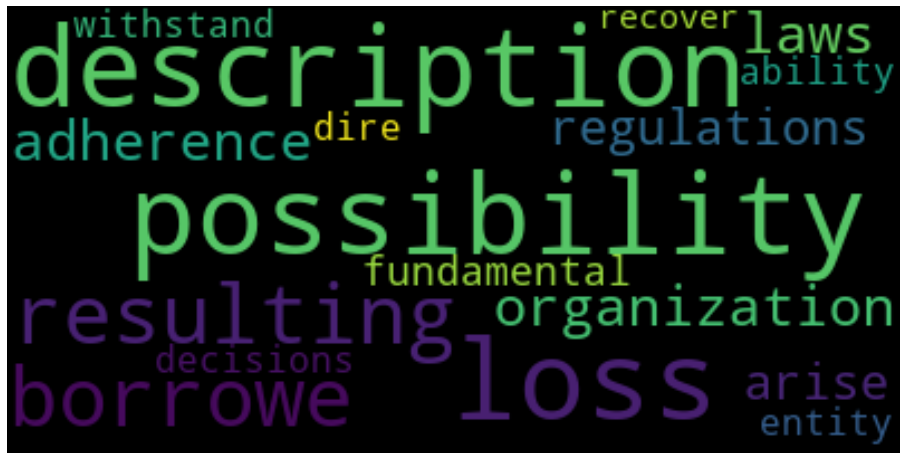

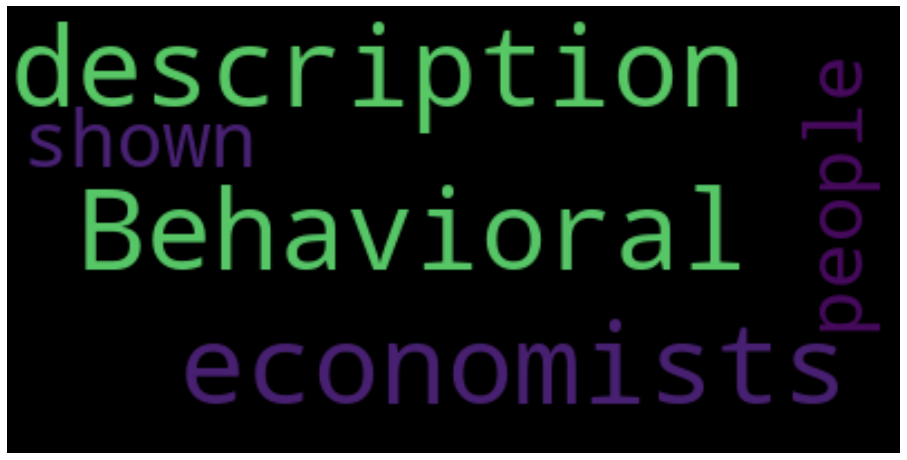

In [10]:
for period in arrayPeriods:
    
    wordcloud = WordCloud(
        background_color = '#000',
        stopwords = stop_words_customized,
        max_words = 20,
        max_font_size = 50,
        random_state = 42
    ).generate(str(df.loc[(df['period']==period)][['description']]))
    
    print(wordcloud)
    fig = plt.figure(figsize=(16, 14))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    fig.savefig("outputs/wordclouds/wordcloud_"+period+".png", dpi=900)
